# Imports

##### General imports

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import pprint

##### Import from flatland environment 

In [3]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator,sparse_rail_generator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator, sparse_schedule_generator
from flatland.utils.rendertools import RenderTool, AgentRenderVariant

##### Import from our framework

In [4]:
from src.graph import NetworkGraph

In [5]:
from src.flows import *
from src.navigation.navigation_path import *

# Test of time expanded network

##### Create a flatland network

sparse netwrok

In [ ]:
if True:
    number_agents = 6

    size_side = 30
    stochastic_data = {'prop_malfunction': 0,  # Percentage of defective agents
                       'malfunction_rate': 30,  # Rate of malfunction occurence
                       'min_duration': 3,  # Minimal duration of malfunction
                       'max_duration': 20  # Max duration of malfunction
                       }
    speed_ration_map = {1.: 1,  # Fast passenger train
                        1. / 2.: 0,  # Fast freight train
                        1. / 3.: 0,  # Slow commuter train
                        1. / 4.: 0}  # Slow freight train
    env = RailEnv(width=size_side,
                  height=size_side,
                  rail_generator=sparse_rail_generator(max_num_cities=number_agents+2
                                                       
                                                       ,
                                                       # Number of cities in map (where train stations are)
                                                       seed=14,  # Random seed
                                                       grid_mode=True,
                                                       max_rails_between_cities=4,
                                                       max_rails_in_city=4,
                                                       ),
                  schedule_generator=sparse_schedule_generator(speed_ration_map,seed = 2),
                  number_of_agents=number_agents,
                  stochastic_data=stochastic_data,  # Malfunction data generator
                  obs_builder_object=GlobalObsForRailEnv(),
                  remove_agents_at_target=True
                  )

    # RailEnv.DEPOT_POSITION = lambda agent, agent_handle : (agent_handle % env.height,0)
    env.reset()

    env_renderer = RenderTool(env,
                              agent_render_variant=AgentRenderVariant.AGENT_SHOWS_OPTIONS_AND_BOX,
                              show_debug=True,
                              screen_height=1100,
                              screen_width=1800)
    env_renderer.reset()

    env_renderer.render_env(show=True, show_observations=False, show_predictions=False)


In [ ]:
env.agents

In [ ]:
solver = Solver("wtf.log",useDirections=True)

In [ ]:
solver.solve(env)

In [ ]:
solver.run(env,env_renderer)

In [ ]:
env.agents

In [ ]:
env.restart_agents()

modify the starting point so that all agents have different starting point

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import pprint

from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator,sparse_rail_generator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator, sparse_schedule_generator
from flatland.utils.rendertools import RenderTool, AgentRenderVariant

from src.flows import *

number_agents = 5

size_side = 7
env = RailEnv(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=number_agents, nr_extra=1, 
                                                    min_dist=1, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()



env_renderer = RenderTool(env,
                         agent_render_variant=AgentRenderVariant.AGENT_SHOWS_OPTIONS_AND_BOX,
                              show_debug=True,)
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)

solver = Solver("test.log",verbose=False)

solver.solve(env,40)

5it [00:00, 145.04it/s]

Academic license - for non-commercial use only


69.0

In [ ]:
import collections

In [ ]:
od = collections.OrderedDict(sorted(solver.solution_cell.items()))

In [ ]:
sum(solver.master.stats['variablesAdded'])

In [ ]:
solver.run(env,env_renderer)

In [ ]:
solver.solution_cell[4]

In [ ]:
flatlandNetwork = NetworkGraph(np.array(env.rail.grid.tolist()))

In [ ]:
env.restart_agents()

In [ ]:
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)


In [ ]:
_ = env.step({4:1})

In [ ]:
env.agents

In [ ]:
start = [a[0] for _,a in solver.solution_cell.items()]

In [ ]:
start_initial_solution = [a[0] for _,a in solver.solution_edge.items()]

In [ ]:
start_master = [a[0] for _,a in solver.master.get_solution().items()]

In [ ]:
start_master

In [ ]:
info

In [ ]:
env.agents

solver.initialSolutionGenerator.stats

In [ ]:
solver.solution

In [ ]:
from src.navigation.navigation_path import *

In [ ]:
walk_path(env,env_renderer,solver.solution[0],0)

In [ ]:
solver.initialSolutionGenerator.stats

In [ ]:
solver2 = Solver("test.log","Arc Formulation")
solver2.solve(env,100)

In [ ]:
solver2.stats

In [ ]:
solver.stats

In [ ]:
master = solver.master 

In [ ]:
result = np.where(np.array(solutions) == 1.)

In [ ]:
solutions = master.model.getAttr("X")

In [ ]:
result

In [ ]:
for v in master.model.getVars():
        print('%s %g' % (v.varName, v.x))

In [ ]:
inter = v.VarName.split("[")[-1]
inter = inter.split("]")[0]
c = int(inter.split(",")[0])
path = int(inter.split(",")[-1])

In [ ]:
c,path

In [ ]:
sources = []
sinks = []
directions = []
for agent in env.agents:
    sources.append(agent.initial_position)
    sinks.append(agent.target)
    try:
        directions.append(agent.direction)
    except:
        pass

In [ ]:
sources

In [ ]:
sinks

In [ ]:
directions

In [ ]:
solver.master.get_solution()

In [ ]:
if len(directions) == 0:
    directions = None

##### create a time expanded network

In [6]:
import time

In [ ]:
start = time.time()
TestNetworkTime = TimeNetwork(flatlandNetwork, depth=100)
stop = time.time()
print(f'time taken to build the graph: {stop-start}')

In [ ]:
TestNetworkTime.connect_sources_and_sink(sources,sinks,directions)

### create initial solution

In [ ]:
from tqdm import tqdm

In [2]:
constraints, find_constraints = solver.timeExpandedNetwork.get_topology_network()

In [3]:
test = InitialSolutionGenerator(solver.timeExpandedNetwork,constraints,find_constraints,len(solver.sources))

In [4]:
solution = test.getInitialSolution()

5it [00:00, 24.25it/s]


iteration  1


/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


press any key to continue
 commodities with updated paths: dict_keys([2])
column generation method took 178.129 sec


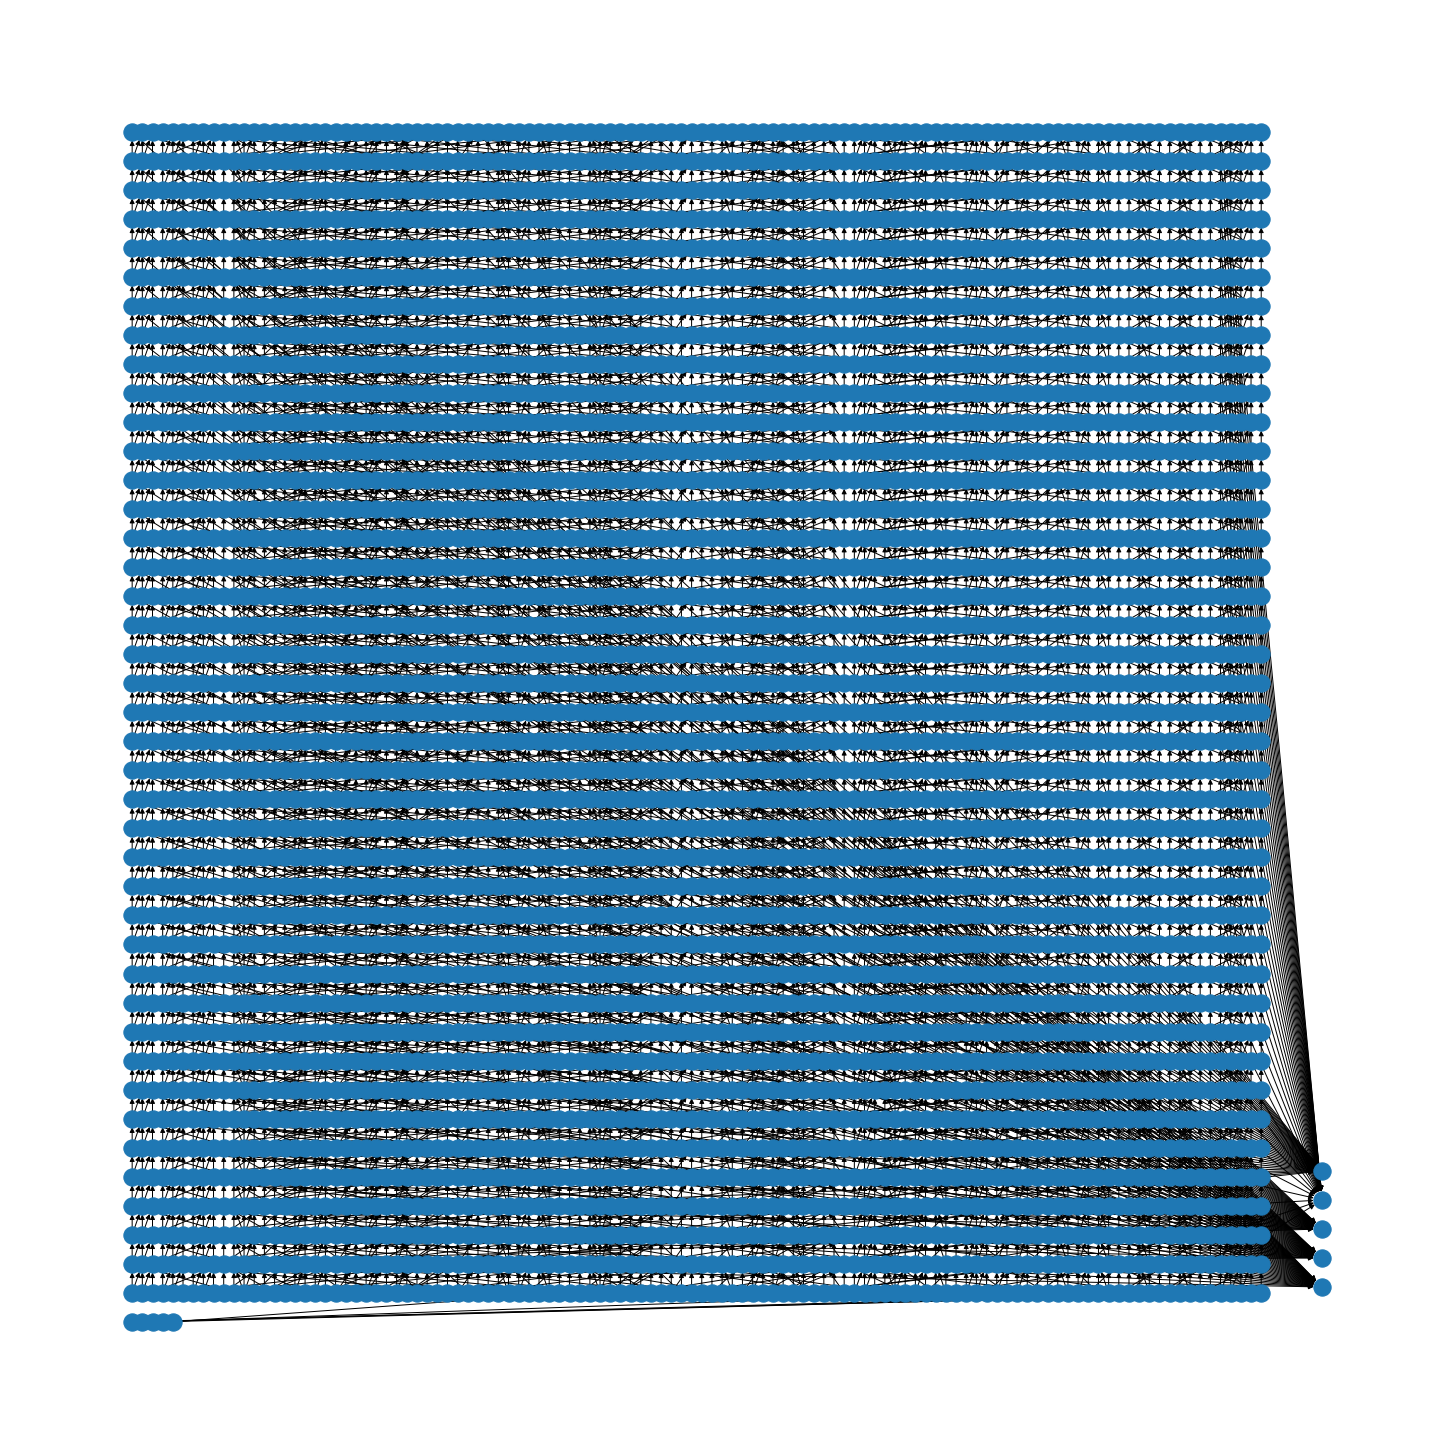

In [29]:
from src.flows.PricingProblem import PricingSolver
start = time.time()
flag = True
iteration = 1
master = MasterProblem.MasterProblem(solution,constraints,find_constraints,number_agents)
master.build()
pricingSolver = PricingSolver(solver.timeExpandedNetwork.graph,constraints,find_constraints,len(solver.sources))
while flag:
    print("iteration ",iteration)
    master.solveRelaxedModel()
    duals = master.getDualVariables()
    pathsToAdd, flag = pricingSolver.get_columns_to_add(master.getDualVariables(),master.constraintsActivated)
    input("press any key to continue")
    if flag:
        #pprint.pprint(pathsToAdd)
        print(f" commodities with updated paths: {pathsToAdd.keys()}")
        iteration+= 1
        master.addColumn(pathsToAdd)
        break
print(f"column generation method took {np.round(time.time()-start,3)} sec")

/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1

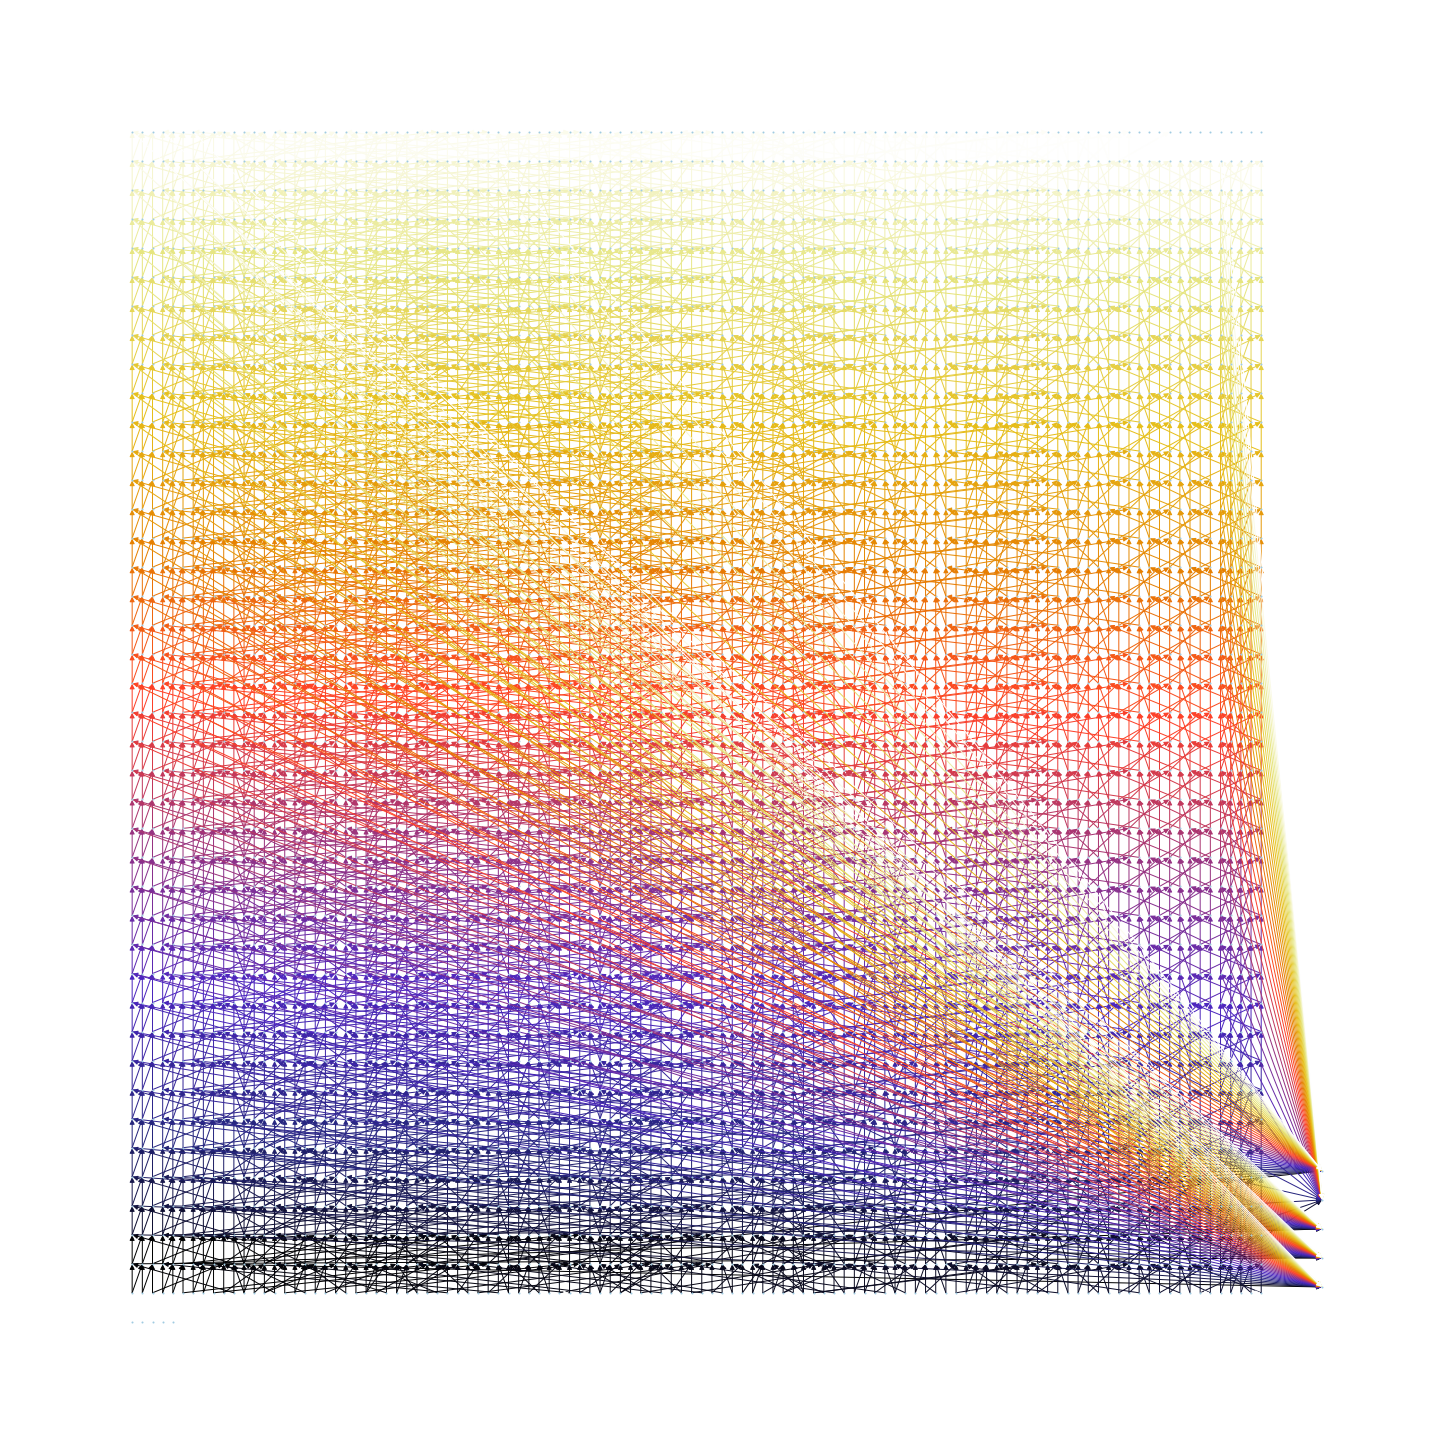

In [18]:
solver.timeExpandedNetwork.show(color = True)

In [31]:
[edge for edge,x in nx.get_edge_attributes(solver.timeExpandedNetwork.graph,"weight_pricing_problem").items() if x > 1]

[]

In [24]:
solver.initialSolution

[[('source_0', '(6, 4)_N_out_t0'),
  ('(6, 4)_N_out_t0', '(5, 4)_S_in_t1'),
  ('(5, 4)_S_in_t1', '(5, 4)_N_out_t2'),
  ('(5, 4)_N_out_t2', '(4, 4)_S_in_t3'),
  ('(4, 4)_S_in_t3', '(4, 4)_W_out_t4'),
  ('(4, 4)_W_out_t4', '(4, 3)_E_in_t5'),
  ('(4, 3)_E_in_t5', '(4, 3)_N_out_t6'),
  ('(4, 3)_N_out_t6', '(3, 3)_S_in_t7'),
  ('(3, 3)_S_in_t7', '(3, 3)_W_out_t8'),
  ('(3, 3)_W_out_t8', '(3, 2)_E_in_t9'),
  ('(3, 2)_E_in_t9', '(3, 2)_N_out_t10'),
  ('(3, 2)_N_out_t10', '(2, 2)_S_in_t11'),
  ('(2, 2)_S_in_t11', '(2, 2)_W_out_t12'),
  ('(2, 2)_W_out_t12', '(2, 1)_E_in_t13'),
  ('(2, 1)_E_in_t13', '(2, 1)_N_out_t14'),
  ('(2, 1)_N_out_t14', '(1, 1)_S_in_t15'),
  ('(1, 1)_S_in_t15', 'sink_0')],
 [('source_1', '(5, 6)_N_out_t0'),
  ('(5, 6)_N_out_t0', '(4, 6)_S_in_t1'),
  ('(4, 6)_S_in_t1', '(4, 6)_N_out_t2'),
  ('(4, 6)_N_out_t2', '(3, 6)_S_in_t3'),
  ('(3, 6)_S_in_t3', '(3, 6)_W_out_t4'),
  ('(3, 6)_W_out_t4', '(3, 5)_E_in_t5'),
  ('(3, 5)_E_in_t5', '(3, 5)_N_out_t6'),
  ('(3, 5)_N_out_t6', '(

In [26]:
solver.master.model.optimize()

In [28]:
solver.master.stats

{'variablesAdded': [0, 3, 5, 0, 0]}

In [ ]:
test.showStats()

In [ ]:
solution

In [ ]:
len(solution)

In [ ]:
cost = 0
for p in solution:
    cost += len(p)
    
print(cost)

In [ ]:
solver = Solver("./test_new.log",useDirections=True)

In [ ]:
solver.solve(env)

In [ ]:
starter = [p[0] for _,p in solver.solution_cell.items()]
finished = [p[-1] for _,p in solver.solution_cell.items()]

In [ ]:
starter

In [ ]:
finished

In [ ]:
initial_positions_agents = [agent.initial_position for agent in env.agents]
destination_agents = [agent.target for agent in env.agents]

In [ ]:
starter

In [ ]:
env.agents

In [ ]:
env.restart_agents()

In [ ]:
env.agents

In [ ]:
paths = solver.prepare_paths(env)

In [ ]:
droppped = [6, 9, 13, 14, 15, 18, 19]

In [ ]:
solver.dropped = droppped

In [ ]:
solver.run(env,env_renderer)

In [ ]:
env_renderer.render_env(show = True,show_predictions=False,show_observations= False)

In [ ]:
env.agents

In [ ]:
solver.solution_cell[0][0] = (9,8)

In [ ]:
_ = env.step({0:4,1:2,2:4})
_ = env.step({0:4,1:2,2:4})
_ = env.step({0:1,1:4,2:1})

In [ ]:
 _ = env.step({i:1 for i in range(3)})

In [ ]:
env_renderer.render_env(show=True, 
                            show_predictions=False, 
                            show_observations=False)

In [ ]:
for k in range(number_agents):
    _ = env.step({k:1})
    env_renderer.render_env(show=True, 
                            show_predictions=False, 
                            show_observations=False)
    #_ = env.step({k:actions_list[k][0]})
    env_renderer.render_env(show=True, 
                            show_predictions=False, 
                            show_observations=False)

In [ ]:
_ = env.step({})
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)

In [ ]:
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)

In [ ]:
actions_list = [actions_for_path(path, env.agents[k].direction) for k, path in solver.solution_cell.items()]

In [ ]:
setup_env(env,[p for _,p in solver.solution_cell.items()],actions_list)

In [ ]:
check_position(1,env,[p for _,p in solver.solution_cell.items()])

In [ ]:
i = 1

In [ ]:
actions_dict = {k:actions_list[k][i] for k in range(3) if len(actions_list[k])>i}
env.step(actions_dict)
check_position(i+1,env,[p for _,p in solver.solution_cell.items()])
env_renderer.render_env(show=True, show_predictions=False, 
                        show_observations=False)
i += 1

In [ ]:
env.agents

In [ ]:
i

In [ ]:
env.agents[0].position

In [ ]:
solver.solution_cell[0]

In [ ]:
[len(p) for p in actions_list]

In [ ]:
walk_path(env,env_renderer,path_faulty,1)

In [ ]:
path_faulty = solver.solution_cell[1]

In [ ]:
from src.navigation.navigation_path import *

In [ ]:
actions = actions_for_path(path_faulty,env.agents[1].direction)

In [ ]:
print(actions)

In [ ]:
_= env.step({1:1})
i = 0

In [ ]:
_ = env.step({1:actions[i]})
print(actions[i])
env_renderer.render_env(show=True, 
                        show_predictions=False, 
                        show_observations=False)
i += 1

In [ ]:
solver.solution_cell

In [ ]:
cost = 0
for p in solver.initialSolutionGenerator.solution:
    cost += len(p)
    
print(cost)

In [ ]:
env.agents

In [ ]:
solver.solution_cell

In [ ]:
env.agents

In [ ]:
solver.solution_cell[]

In [ ]:
longest = 0
for agent,path in solver.solution_cell.items():
        longest = max(longest,len(path))


In [ ]:
pathsSameSize = []

In [ ]:
for agent,path in solver.solution_cell.items():
    for i in range(longest-len(path)):
        path.append(None)
    pathsSameSize.append(path)

In [ ]:
for i in range(longest-1):
    cell_used = []
    cell_to_be_used = []
    for p in pathsSameSize:
        cell_used.append(p[i])
        cell_to_be_used.append(p[i+1])
    if len(set(cell_used)) != len(cell_used) and None not in cell_used:
        print("error at time ",i)
        print(cell_used)
    usedattwotimestep = set(cell_used).intersection(cell_to_be_used)
    if len(usedattwotimestep)>0:
        for i,elt in enumerate(cell_used):
            for j,elt2 in enumerate(cell_to_be_used):
                if i!= j and elt2 == elt and elt2 is not None:
                    print("swapping")
                    print(cell_used)
                    print(cell_to_be_used)
                    print("")

In [ ]:
from src.flows.PricingProblem import PricingSolver

In [ ]:
Weigths_dictionnaries = []

In [ ]:
from copy import deepcopy

In [ ]:
from src.flows.PricingProblem import PricingSolver
start = time.time()
flag = True
iteration = 1
master = MasterProblem.MasterProblem(solution,constraints,find_constraints,number_agents)
master.build()
pricingSolver = PricingSolver(TestNetworkTime.graph,constraints,find_constraints,len(sources))
while flag:
    print("iteration ",iteration)
    master.solveRelaxedModel()
    duals = master.getDualVariables()
    pathsToAdd, flag = pricingSolver.get_columns_to_add(master.getDualVariables(),master.constraintsActivated)
    TestNetworkTime.show(color = True)
    input("press any key to continue")
    if flag:
        #pprint.pprint(pathsToAdd)
        print(f" commodities with updated paths: {pathsToAdd.keys()}")
        iteration+= 1
        master.addColumn(pathsToAdd)
print(f"column generation method took {np.round(time.time()-start,3)} sec")

In [ ]:
TestNetworkTime.show(color = True)

In [ ]:
master.relaxedModel.objVal

In [ ]:
master.model.optimize()

In [ ]:
master.model.objVal

In [ ]:
for v in master.relaxedModel.getVars():
    print('%s %g' % (v.varName, v.x))

In [ ]:
for v in master.model.getVars():
    print('%s %g' % (v.varName, v.x))

In [ ]:
master.cost

In [ ]:
master.model.write("temp/test.lp")

##### Test LP Formulation

test a simple graph

In [ ]:
import datetime as dt
print(dt.datetime.now())

In [ ]:
constraints,findConstraints = TestNetworkTime.get_topology_network()

In [ ]:
mcflow = MCFlow(TestNetworkTime.graph,len(sources),constraints,integer = True)

In [ ]:
mcflow.solve()

In [ ]:
paths = solver2.mcflow.solution_complete_edges

In [ ]:
score = 0
for _,path in paths.items():
    score += len(path)
    
print(f"score {score}")

In [ ]:
mcflow = solver2.mcflow

In [ ]:
paths

In [ ]:
lengths = []
pathsToAllongate = copy.deepcopy(mcflow.solution)
for agent,path in pathsToAllongate.items():
    lengths.append(len(path))
    
maxLength = max(lengths)
for agent,path in pathsToAllongate.items():
    for i in range(maxLength-len(path)):
        path.append(None)
    pathsToAllongate[agent] = path

In [ ]:
dfPaths = pd.DataFrame(pathsToAllongate)
dfPaths

In [ ]:
colors = [(230, 25, 75), (60, 180, 75), (255, 225, 25), (0, 130, 200), (245, 130, 48),
          (145, 30, 180), (70, 240, 240), (240, 50, 230), (210, 245, 60), (250, 190, 190),
          (0, 128, 128), (230, 190, 255), (170, 110, 40), (255, 250, 200), (128, 0, 0), (170, 255, 195),
          (128, 128, 0), (255, 215, 180), (0, 0, 128), (128, 128, 128), (255, 255, 255), (0, 0, 0)]
colors = [(x[0]/255.,x[1]/255.,x[2]/255.) for x in colors]

In [ ]:
solver.transitionNetwork.show(paths = mcflow.solution_complete_edges)